In [1]:
import math
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


molecules = ["N2-N2", "O2-O2"]
lwidth = 1
msize = 4
s = 16

In [4]:
def get_all_data_points(folder_name: str):
    data_dict = {}
    with os.scandir(folder_name) as entries:
        for entry in entries:
            arr = []
            if entry.is_file():
                with open(entry.path, 'r') as file:
                    for line in file:
                        d = line.strip().split()
                        arr.append([float(i.replace(',', '.')) for i in d])
                arr = np.array(arr)
                # print(arr)
                data_dict[os.path.splitext(os.path.basename(entry))[0]] = arr
    return data_dict

In [5]:
data = get_all_data_points("N2-N2")

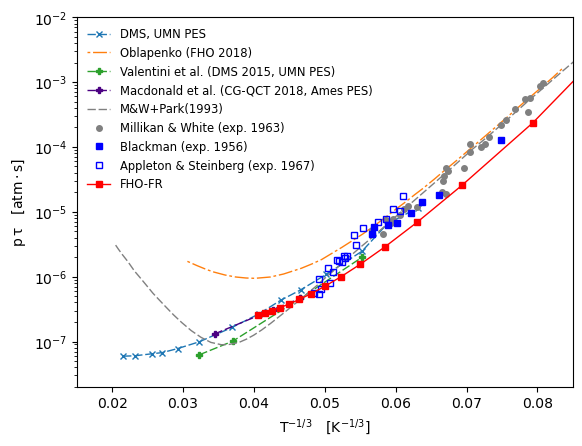

In [9]:
fig, ax = plt.subplots()

dms, = ax.plot(data['DMS'][:, 0], data['DMS'][:, 1], 'x', markersize=msize, linewidth=lwidth)
dms.set_dashes([6, 2])
dms.set_label('DMS, UMN PES')

fho, = ax.plot(data['FHO'][:, 0], data['FHO'][:, 1], linewidth=lwidth)
fho.set_dashes([2, 2, 10, 2])
fho.set_label('Oblapenko (FHO 2018)')

valentini_dms, = ax.plot(data['Valentini'][:, 0], data['Valentini'][:, 1], '-P', markersize=msize, linewidth=lwidth)
valentini_dms.set_dashes([6, 2])
valentini_dms.set_label('Valentini et al. (DMS 2015, UMN PES)')

macdonald_cg_qct, = ax.plot(data['Macdonald'][:, 0], data['Macdonald'][:, 1], '-P', color='indigo', markersize=msize, linewidth=lwidth)
macdonald_cg_qct.set_dashes([6, 2])
macdonald_cg_qct.set_label('Macdonald et al. (CG-QCT 2018, Ames PES)')

mw_park, = ax.plot(data['MW_Park'][:, 0], data['MW_Park'][:, 1], color='gray', linewidth=lwidth)
mw_park.set_dashes([6, 2])
mw_park.set_label('M&W+Park(1993)')

mw, = ax.plot(data['MW'][:, 0], data['MW'][:, 1], 'o', color='gray', markersize=msize)
mw.set_label('Millikan & White (exp. 1963)')

blackman, = ax.plot(data['Blackman'][:, 0], data['Blackman'][:, 1], 's', color='blue', markersize=msize)
blackman.set_label('Blackman (exp. 1956)')

ap_st, = ax.plot(data['Ap_St'][:, 0], data['Ap_St'][:, 1], 's', fillstyle='none', color='blue', markersize=msize)
ap_st.set_label('Appleton & Steinberg (exp. 1967)')

fho_fr, = ax.plot((data['FHO_FR'][:, 0]) ** (-1/3), data['FHO_FR'][:, 1], '-s', markersize=msize, linewidth=lwidth, color='red')
fho_fr.set_label('FHO-FR')

ax.set_yscale('log')
plt.legend(frameon=False, framealpha=0, fontsize='small')

# ax.grid(True)
ax.set_xlim(0.015, 0.085)
ax.set_ylim(0.2e-7, 1e-2)
ax.set_xlabel(r'$\mathrm{T^{-1/3} \quad [K^{-1/3}]}$')
ax.set_ylabel(r'$\mathrm{ p \, \tau \quad [atm \cdot s]}$')
plt.show()

fig.savefig(molecules[0] + '.png', dpi=600)